<a href="https://colab.research.google.com/github/vatsh001/Fraud-App/blob/main/Copy_of_fraud_detection_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

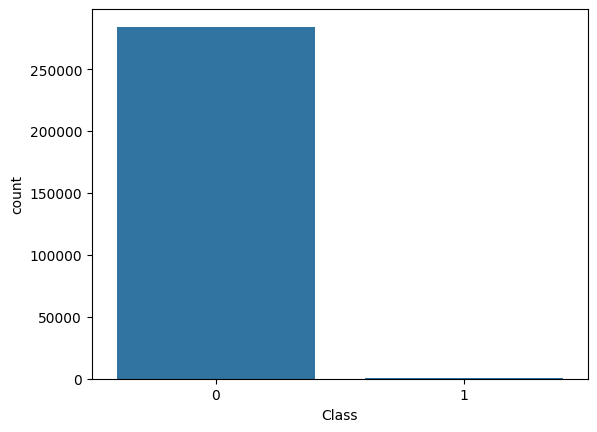

Random Forest Accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9818 - loss: 0.0491 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9993 - loss: 0

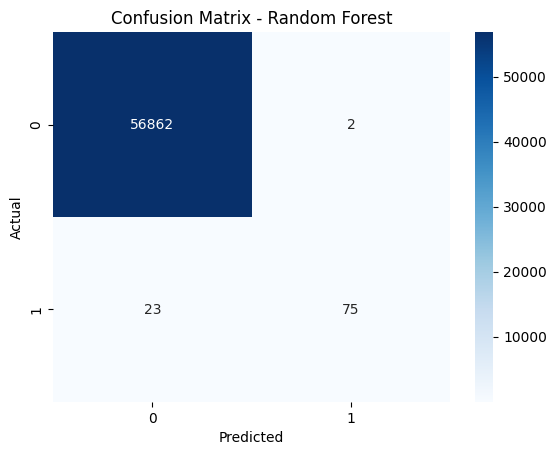

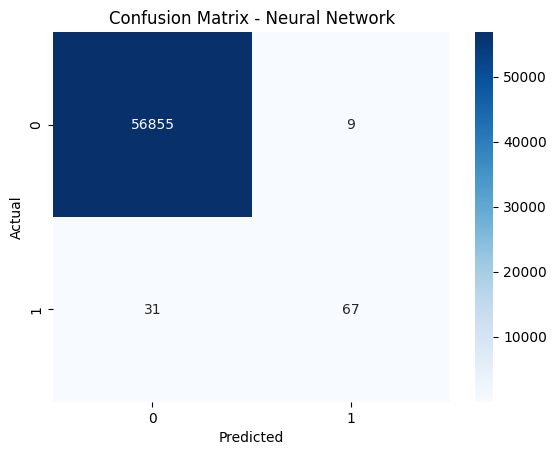

In [ ]:
# Fraud Detection & Prevention AI Tool
# This project is designed for Google Colab and requires no prior coding knowledge.


# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 3: Load Dataset (Example Dataset: Credit Card Fraud Detection)
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

# Step 4: Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())
sns.countplot(x='Class', data=df)
plt.show()

# Step 5: Data Preprocessing
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Build Machine Learning Model (Random Forest)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 7: Build Deep Learning Model (Neural Network)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Evaluate Neural Network Model
y_pred_nn = (model.predict(X_test) > 0.5).astype('int32')
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Step 9: Visualize Model Performance
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()

# Step 10: Save and Load Model for Deployment
model.save('fraud_detection_model.h5')
loaded_model = keras.models.load_model('fraud_detection_model.h5')
